# 2018年台北市市長選舉候選人政治現金收入分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import math
import numpy as np

In [2]:
income = pd.read_csv('election-108080202-107104-63000/incomes.csv')

In [3]:
income.head()

,序號,擬參選人／政黨,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,1,丁守中,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王施美雀,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,0932*****,NaN
1,2,丁守中,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王穩超,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,NaN,NaN
2,3,丁守中,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王謄健,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,NaN,NaN
3,4,丁守中,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王貞傑,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,0932*****,NaN
4,5,丁守中,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王偉聖,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,NaN,NaN


將候選人名字轉為代碼A~E <br>
'丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'

In [4]:
income['擬參選人／政黨'] = income['擬參選人／政黨'].map({'丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'})
income.head()

,序號,擬參選人／政黨,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,1,A,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王施美雀,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,0932*****,NaN
1,2,A,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王穩超,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,NaN,NaN
2,3,A,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王謄健,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,NaN,NaN
3,4,A,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王貞傑,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,0932*****,NaN
4,5,A,107年直轄市市長選舉,首次申報,1070518,個人捐贈收入,王偉聖,NaN,20000.0,0.0,NaN,金錢,臺北市信義區****,NaN,NaN


## 統計五位候選人政治現金總收入

In [5]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf')

In [6]:
income.groupby('擬參選人／政黨')['收入金額'].sum()

擬參選人／政黨
A    68343949.0
B      334723.0
C    56378893.0
D      963150.0
E    44053640.0
Name: 收入金額, dtype: float64

Text(0.5, 1.0, '統計')

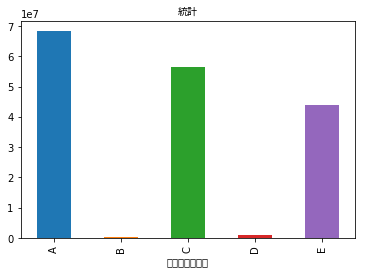

In [7]:
income.groupby('擬參選人／政黨')['收入金額'].sum().plot('bar')
plt.title('統計', fontproperties=myfont)
# '丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'

## 每月的次數以及月總額

檢查日期欄位的型態

In [8]:
income['交易日期'].dtype

dtype('int64')

產生交易月份欄位

In [9]:
income['交易月份'] = income['交易日期'].apply(lambda x:str(x)[:5])

In [10]:
date = pd.DataFrame(income.groupby(['交易月份','擬參選人／政黨'])['序號'].count()).reset_index()
date['序號'] = date['序號'].astype('float')

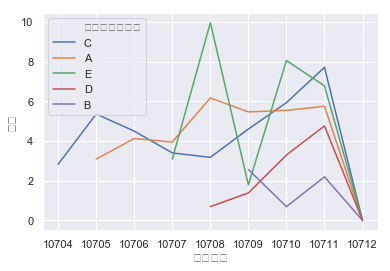

In [11]:
sns.set()
sns.lineplot(x='交易月份', y=np.log(date['序號'])
             , data=date, hue="擬參選人／政黨")
# '丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'

In [12]:
income[income['交易月份']=='10712']

,序號,擬參選人／政黨,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期,交易月份
1424,1425,A,107年直轄市市長選舉,首次申報,1071221,其他收入,利息收入,NaN,6184.0,0.0,NaN,金錢,NaN,NaN,NaN,10712
1449,1450,B,107年直轄市市長選舉,首次申報,1071221,其他收入,利息收入,NaN,3.0,0.0,NaN,金錢,NaN,NaN,NaN,10712
1600,1601,D,107年直轄市市長選舉,首次申報,1071221,其他收入,利息收入,NaN,60.0,0.0,NaN,金錢,NaN,NaN,NaN,10712
4691,4692,C,107年直轄市市長選舉,首次申報,1071221,其他收入,利息收入,NaN,3068.0,0.0,NaN,金錢,NaN,NaN,NaN,10712
29955,29956,E,107年直轄市市長選舉,首次申報,1071221,其他收入,利息收入,NaN,742.0,0.0,NaN,金錢,NaN,NaN,NaN,10712


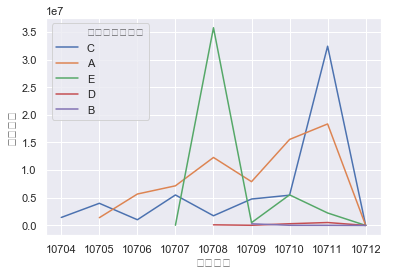

In [13]:
date_money = pd.DataFrame(income.groupby(['交易月份','擬參選人／政黨'])['收入金額'].sum()).reset_index()

sns.set()
sns.lineplot(x='交易月份', y='收入金額'
             , data=date_money, hue="擬參選人／政黨")
# '丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'

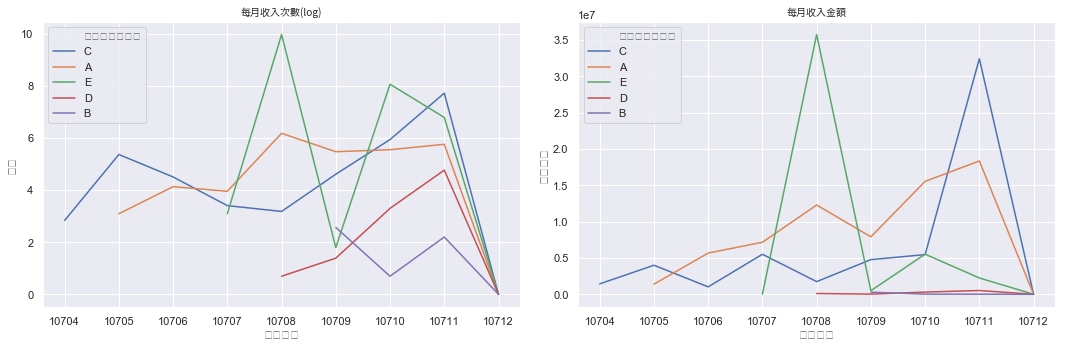

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.lineplot(x='交易月份', y=np.log(date['序號'])
             , data=date, hue="擬參選人／政黨")
plt.title('每月收入次數(log)', fontproperties=myfont)

plt.subplot(1, 2, 2)
sns.lineplot(x='交易月份', y='收入金額'
             , data=date_money, hue="擬參選人／政黨")
plt.title('每月收入金額', fontproperties=myfont)

plt.tight_layout()
# '丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'

## 跟真實投票結果比較

In [15]:
names =['A', 'B', 'C', 'D', 'E']
roll = [577096  , 5611, 244342, 6158, 580663]

<BarContainer object of 5 artists>

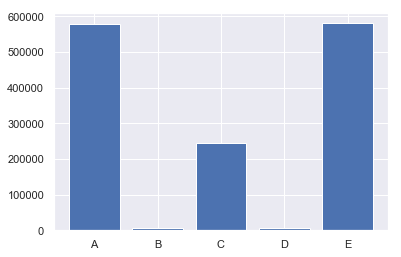

In [16]:
plt.bar(names, roll)
# '丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'

<BarContainer object of 5 artists>

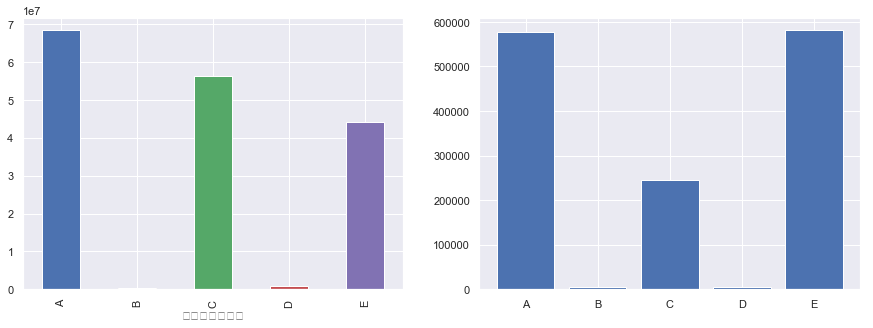

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
income.groupby('擬參選人／政黨')['收入金額'].sum().plot('bar')

plt.subplot(1, 2, 2)
plt.bar(names, roll)
# '丁守中':'A', '吳蕚洋':'B', '姚文智':'C', '李錫錕':'D', '柯文哲':'E'